# Pandas (phần 2)

Cập nhật lần cuối: 19/12/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Đọc dữ liệu từ file vào dataframe

pd.read_csv

Dữ liệu: [MovieLens 100K Dataset](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip). Có tất cả 4 file csv, trong phần demo bên dưới chỉ dùng 2 file.

Theo [file mô tả dữ liệu](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html):
>This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
>
>Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

In [2]:
# Đọc dữ liệu từ file movies.csv vào dataframe movies_df
# Đọc dữ liệu từ file ratings.csv vào dataframe ratings_df
# Mình đặt các file csv trong thư mục Data/ml-latest-small
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('Data/ml-latest-small/ratings.csv')

## Xem nhanh một vài dòng của dataframe

- df.head
- df.tail
- df.sample

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Xem các thông tin của dataframe

- len(df)
- df.shape
- df.index
- df.columns
- df.dtypes
- df.values (vì tương lai, nên thay bằng df.to_numpy)
- df.info

## Truy xuất dữ liệu ở dataframe

- df.iloc[r, c]
- df.loc[r, c]
- df[...]

## Thay đổi dữ liệu ở dataframe

- df.iloc[...] = ...
- df.loc[...] = ...
- df[...] = ...

In [5]:
ratings_df[ratings_df['rating'] == 5]['rating'] = 4.9

/tmp/ipykernel_20055/3274853456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df[ratings_df['rating'] == 5]['rating'] = 4.9


In [6]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Thay đổi tên dòng/cột ở dataframe

- df.rename
- df.columns = ...
- df.index = ...
- df.set_index, df.reset_index

## Thay đổi kiểu dữ liệu của cột ở dataframe

s.astype dùng để ép kiểu dữ liệu của một series.

In [7]:
ratings_df['timestamp'].astype('datetime64[s]')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

pd.to_datetime chuyên dùng để ép kiểu dữ liệu datetime, có thể xử lý được những trường hợp phức tạp mà s.astype không làm được.

In [8]:
ratings_df['timestamp'] = \
    pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [9]:
# Trường hợp mà s.astype không làm được
s = pd.Series(['1*1*2021', '30*1*2021'])
pd.to_datetime(s, format='%d*%m*%Y')

0   2021-01-01
1   2021-01-30
dtype: datetime64[ns]

## Thực hiện thao tác với cột có kiểu dữ liệu dạng thời gian ở dataframe

s.dt.thao-tac-x

In [10]:
ratings_df['timestamp'].dt.dayofyear

0         212
1         212
2         212
3         212
4         212
         ... 
100831    123
100832    123
100833    128
100834    123
100835    123
Name: timestamp, Length: 100836, dtype: int64

## Thực hiện thao tác với cột có kiểu dữ liệu dạng chuỗi ở dataframe

s.str.thao-tac-x

In [11]:
movies_df['title'].str.upper()

0                                TOY STORY (1995)
1                                  JUMANJI (1995)
2                         GRUMPIER OLD MEN (1995)
3                        WAITING TO EXHALE (1995)
4              FATHER OF THE BRIDE PART II (1995)
                          ...                    
9737    BLACK BUTLER: BOOK OF THE ATLANTIC (2017)
9738                 NO GAME NO LIFE: ZERO (2017)
9739                                 FLINT (2017)
9740          BUNGO STRAY DOGS: DEAD APPLE (2018)
9741          ANDREW DICE CLAY: DICE RULES (1991)
Name: title, Length: 9742, dtype: object

## Thêm/xóa dòng/cột ở dataframe

Thêm dòng/cột

In [12]:
new_col = movies_df['movieId'] * 10
new_col.name = 'newCol'
pd.concat([movies_df, new_col], axis=1)

,movieId,title,genres,newCol
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10
1,2,Jumanji (1995),Adventure|Children|Fantasy,20
2,3,Grumpier Old Men (1995),Comedy|Romance,30
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,40
4,5,Father of the Bride Part II (1995),Comedy,50
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1935810
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1935830
9739,193585,Flint (2017),Drama,1935850
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1935870


In [13]:
new_row = movies_df.iloc[[-1], :]
pd.concat([movies_df, new_row], axis=0).tail()

,movieId,title,genres
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [14]:
# Shortcut để thêm cột (hoặc cập nhật một cột đã có sẵn)
movies_df['newCol'] = 1
movies_df.head()

,movieId,title,genres,newCol
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1
4,5,Father of the Bride Part II (1995),Comedy,1


Xóa dòng/cột

In [15]:
movies_df = movies_df.drop(columns='newCol')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [16]:
movies_df.drop(index=[0, 1])

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Xem phân bố các giá trị của mỗi cột ở dataframe

- Cột numeric: tỉ lệ giá trị thiếu, min, median, max; nếu cần chi tiết hơn thì có thể vẽ thêm histogram
- Cột categorical: tỉ lệ giá trị thiếu, số lượng các giá trị khác nhau, show một vài giá trị; nếu cần chi tiết hơn thì có thể vẽ thêm bar plot

In [17]:
def missing_ratio(s):
    return s.isna().mean() * 100
movies_df.agg([missing_ratio, pd.Series.nunique, pd.Series.unique])

,movieId,title,genres
missing_ratio,0.0,0.0,0.0
nunique,9742,9737,951
unique,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Toy Story (1995), Jumanji (1995), Grumpier Ol...","[Adventure|Animation|Children|Comedy|Fantasy, ..."


In [18]:
cate_df = ratings_df[['userId', 'movieId']]
nume_df = ratings_df[['rating', 'timestamp']]

In [19]:
cate_df.agg([missing_ratio, pd.Series.nunique, pd.Series.unique])

,userId,movieId
missing_ratio,0.0,0.0
nunique,610,9724
unique,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,..."


In [20]:
nume_df.agg([missing_ratio, pd.Series.min, pd.Series.median,
             pd.Series.max])

,rating,timestamp
missing_ratio,0.0,0.0
min,0.5,1996-03-29 18:36:55
median,3.5,2007-08-02 20:31:02
max,5.0,2018-09-24 14:27:30


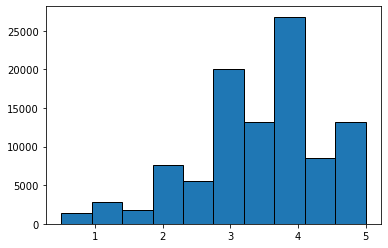

In [21]:
# Minh họa cách vẽ histogram với cột rating của ratings_df
# Ở bên dưới, Pandas dùng Matplotlib để vẽ -> khi cần tinh chỉnh 
# hình vẽ thì có thể dùng các câu lệnh của Matplotlib
ratings_df['rating'].plot.hist(edgecolor='black')
plt.ylabel('');

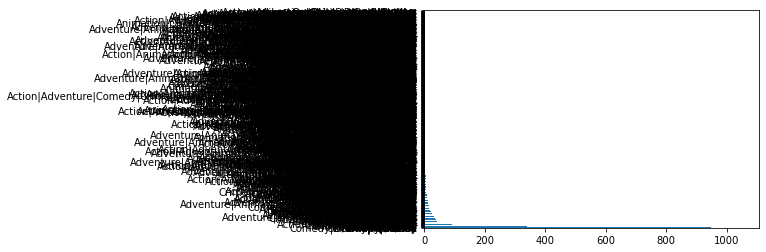

In [22]:
# Minh họa cách vẽ bar plot với cột genres của movies_df
s = movies_df['genres'].value_counts()
s.plot.barh();

## Bài tập

*Vẽ bar chart thể hiện phân bố của các loại phim trong `movies_df`. Loại phim = {Action, Drama, Comedy, ...}. Ví dụ, nếu phim có genres là "Action|Drama" thì cộng 1 cho "Action" và cộng 1 cho "Drama".*

Gợi ý: bạn tra cứu phương thức `explode` của series.

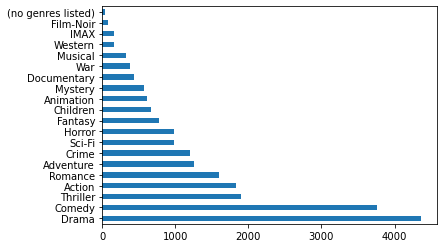

In [23]:
s = movies_df['genres'].str.split('|')
s = s.explode()
s.value_counts().plot.barh();

## Sắp xếp dữ liệu ở dataframe

In [24]:
movies_df.sort_values('title')

,movieId,title,genres
8600,117867,'71 (2014),Action|Drama|Thriller|War
8014,97757,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy
5528,26564,'Round Midnight (1986),Drama|Musical
5690,27751,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller
614,779,'Til There Was You (1997),Drama|Romance
...,...,...,...
1961,2600,eXistenZ (1999),Action|Sci-Fi|Thriller
3920,5507,xXx (2002),Action|Crime|Thriller
5882,33158,xXx: State of the Union (2005),Action|Crime|Thriller
1866,2478,¡Three Amigos! (1986),Comedy|Western


Vẽ đồ thị thể hiện sự thay đổi của số lượng rating qua các năm.

<AxesSubplot:>

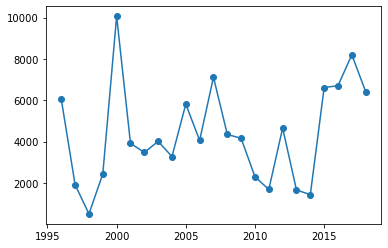

In [25]:
s = ratings_df['timestamp'].dt.year.value_counts()
s = s.sort_index()
s.plot.line(marker='o')

## Bài tập

*Gần đây có phim gì? (nói một cách khác: hãy sắp xếp các dòng của `movies_df` theo thứ tự giảm dần của năm sản xuất phim).*

In [26]:
s = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
s.name = 'year'
df = pd.concat([movies_df, s], axis=1)
df.sort_values('year', ascending=False).head(10)

,movieId,title,genres,year
9678,183295,Insidious: The Last Key (2018),Horror|Mystery|Thriller,2018
9697,184987,A Wrinkle in Time (2018),Adventure|Children|Fantasy|Sci-Fi,2018
9711,187717,Won't You Be My Neighbor? (2018),Documentary,2018
9710,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,2018
9709,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,2018
9708,187541,Incredibles 2 (2018),Action|Adventure|Animation|Children,2018
9707,187031,Jurassic World: Fallen Kingdom (2018),Action|Adventure|Drama|Sci-Fi|Thriller,2018
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,2018
9705,185585,Pacific Rim: Uprising (2018),Action|Fantasy|Sci-Fi,2018
9704,185473,Blockers (2018),Comedy,2018


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
 3   year     9729 non-null   object
dtypes: int64(1), object(3)
memory usage: 304.6+ KB


In [28]:
df[df['year'].isna()]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


## Xử lý giá trị thiếu ở dataframe

Ở đây, mình chỉ giới thiệu về các cách xử lý giá trị thiếu mà Pandas hỗ trợ. Còn dùng như thế nào là phải xem xét tùy vào ngữ cảnh cụ thể.

In [29]:
df = pd.DataFrame({'col1': [1, 1, np.nan], 
                   'col2': [2, np.nan, np.nan],
                   'col3': [np.nan, np.nan, np.nan]})
df

,col1,col2,col3
0,1.0,2.0,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN


Một cách xử lý giá trị thiếu: điền giá trị thiếu bằng một giá trị nào đó.

In [30]:
df.fillna(-1)

,col1,col2,col3
0,1.0,2.0,-1.0
1,1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0


Một cách khác để xử lý giá trị thiếu: bỏ các dòng (hoặc các cột) liên quan.

In [31]:
df

,col1,col2,col3
0,1.0,2.0,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN


In [32]:
# Bỏ đi những dòng mà có ít nhất một cột bị thiếu giá trị
df.dropna(how='any', axis=0)

,col1,col2,col3


In [33]:
# Bỏ đi những dòng mà tất cả các cột đều bị thiếu giá trị
df.dropna(how='all', axis=0)

,col1,col2,col3
0,1.0,2.0,NaN
1,1.0,NaN,NaN


In [34]:
# Bỏ đi những dòng mà col2 và col3 đều bị thiếu giá trị
df.dropna(how='all', subset=['col2', 'col3'], axis=0)

,col1,col2,col3
0,1.0,2.0,NaN


## Bài tập

([Nguồn](https://github.com/brandon-rhodes/pycon-pandas-tutorial))

In [35]:
# Dữ liệu ở file sales1 nhìn chung là đã ngăn nắp
# Đơn vị tiền tệ ở đây là USD
sale1_df = pd.read_csv('Data/sales1.csv')
sale1_df

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [36]:
# Dữ liệu ở file sale2 rất loạn
# 3 cột "Units sold", "List price", "Royalty" lần lượt tương ứng 
# với 3 cột "Number sold", "Sales price", "Royalty paid" ở sale1
sale2_df = pd.read_csv('Data/sales2.csv')
sale2_df.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q4,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80.0,3.5,14.98
4,Swimrand,1.0,2.99,0.14
5,The Bricklayer's Bible,17.0,3.5,5.15
6,The Duck Goes Here,34.0,2.99,5.78
7,The Tower Commission Report,4.0,9.5,6.2
8,US royalties (USD),,,32.25
9,,,,


*Yêu cầu: gộp dữ liệu ở sale1 và sale2 lại thành một dataframe
 với các cột "Book title", "Number sold", "Sales price", "Royalty paid", "Currency" (đơn vị tiền tệ); mỗi dòng ứng với thông tin của một quyển sách, không có dòng "lạc loài".*
 
 Gợi ý:
 - Bạn có thể sẽ cần dùng đến tham số `method` trong phương thức `fillna`.
 - Kết quả sau cùng sẽ có 15 dòng.

In [37]:
df1 = sale1_df
df1['Currency'] = 'USD'
df1

,Book title,Number sold,Sales price,Royalty paid,Currency
0,The Bricklayer’s Bible,8,2.99,0.55,USD
1,Swimrand,2,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28,2.99,0.55,USD
3,The Duck Goes Here,34,2.99,0.55,USD
4,The Tower Commission Report,4,11.50,4.25,USD


In [38]:
df2 = sale2_df
s = df2['Title'].str.extract(r'\((.+)\)').fillna(method='bfill')
df2['Currency'] = s
df2 = df2.dropna()
df2.columns = df1.columns
df2

,Book title,Number sold,Sales price,Royalty paid,Currency
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD
13,Pining for the Fisheries of Yore,47.0,2.99,11.98,GBP
14,The Bricklayer's Bible,17.0,2.99,3.50,GBP
15,The Tower Commission Report,4.0,6.50,4.80,GBP
21,Swimrand,8.0,1.99,0.88,EUR
22,The Duck Goes Here,12.0,1.99,1.50,EUR


In [39]:
pd.concat([df1, df2], axis=0).reset_index(drop=True)

,Book title,Number sold,Sales price,Royalty paid,Currency
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD
1,Swimrand,2.0,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD
3,The Duck Goes Here,34.0,2.99,0.55,USD
4,The Tower Commission Report,4.0,11.50,4.25,USD
5,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
6,Swimrand,1.0,2.99,0.14,USD
7,The Bricklayer's Bible,17.0,3.50,5.15,USD
8,The Duck Goes Here,34.0,2.99,5.78,USD
9,The Tower Commission Report,4.0,9.50,6.20,USD
